<a href="https://colab.research.google.com/github/vipulSharma18/Hack-indore/blob/master/hi_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil
import re
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
!pip install Pathlib

In [0]:
!pip install fastai

In [0]:
%config InlineBackend.figure_format = 'retina'
import random
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

In [0]:
##no need to run it now, it is used to divide data into train and test but dataset is divided already
def split_indices(folder, seed1, seed2):
    n = len(os.listdir(folder)) - 1
    full_set = list(range(1,n+1))
    
    #train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))
    
    #temp remaining to be split into validation and test
    remain = list(set(full_set) - set(train))
    
    #validation and test set creation
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain) - set(valid))
    
    return (train, valid, test)

def get_names(waste_type, indices):
    file_names = [waste_type + ' (' + str(i) + ')' + ".jpg" for i in indices]
    return(file_names)

def move_files(source_files, destination_folder):
    for file in source_files:
        shutil.move(file, destination_folder)

In [0]:
##no need to do this now, already done on data set
subsets = ['train', 'valid']
waste_types = ['wet_waste', 'solid_waste']

#creation of subdirectory according to ImageNet format
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data', subset, waste_type)
        if not os.path.exists(os.path.join('data', 'test')):
            os.makedirs(folder)
if not os.path.exists(os.path.join('data', 'test')):
    os.makedirs(os.path.join('data', 'test'))

#moving of files
for waste_type in waste_types:
    source_folder = os.path.join(waste_type)    #stored in HackIndore not in HackIndore/data
    train_ind, valid_ind, test_ind = split_indices(source_folder, 1, 1)
    
    #move source files to train
    train_names = get_names(waste_type, train_ind)
    train_source_files = [os.path.join(source_folder, name) for name in train_names]
    train_dest = "data/train/"  + waste_type
    move_files(train_source_files, train_dest)
    
    ##move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ##move source files to test
    test_names = get_names(waste_type, test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files,"data/test")

In [0]:
DIM1 = 384
DIM2 = 512

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
cd '/content/gdrive/My Drive'

/content/gdrive/My Drive


In [14]:
os.getcwd()

'/content/gdrive/My Drive'

In [0]:
import zipfile

In [0]:
zip_ref = zipfile.ZipFile("resized.zip", 'r')

In [0]:
zip_ref.extractall()
zip_ref.close()

In [27]:
path = Path(os.path.join(os.getcwd(),'resized'))
path

PosixPath('/content/gdrive/My Drive/resized')

In [0]:
tfms = get_transforms(do_flip = True, flip_vert = True)
data = ImageDataBunch.from_folder(path, test = "test", ds_tfms = tfms, bs=16)

In [33]:
data

ImageDataBunch;

Train: LabelList (5137 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
solid_waste,solid_waste,solid_waste,solid_waste,solid_waste
Path: /content/gdrive/My Drive/resized;

Valid: LabelList (2568 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
solid_waste,solid_waste,solid_waste,solid_waste,solid_waste
Path: /content/gdrive/My Drive/resized;

Test: LabelList (2569 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/resized

In [34]:
print(data.classes)

['solid_waste', 'wet_waste']


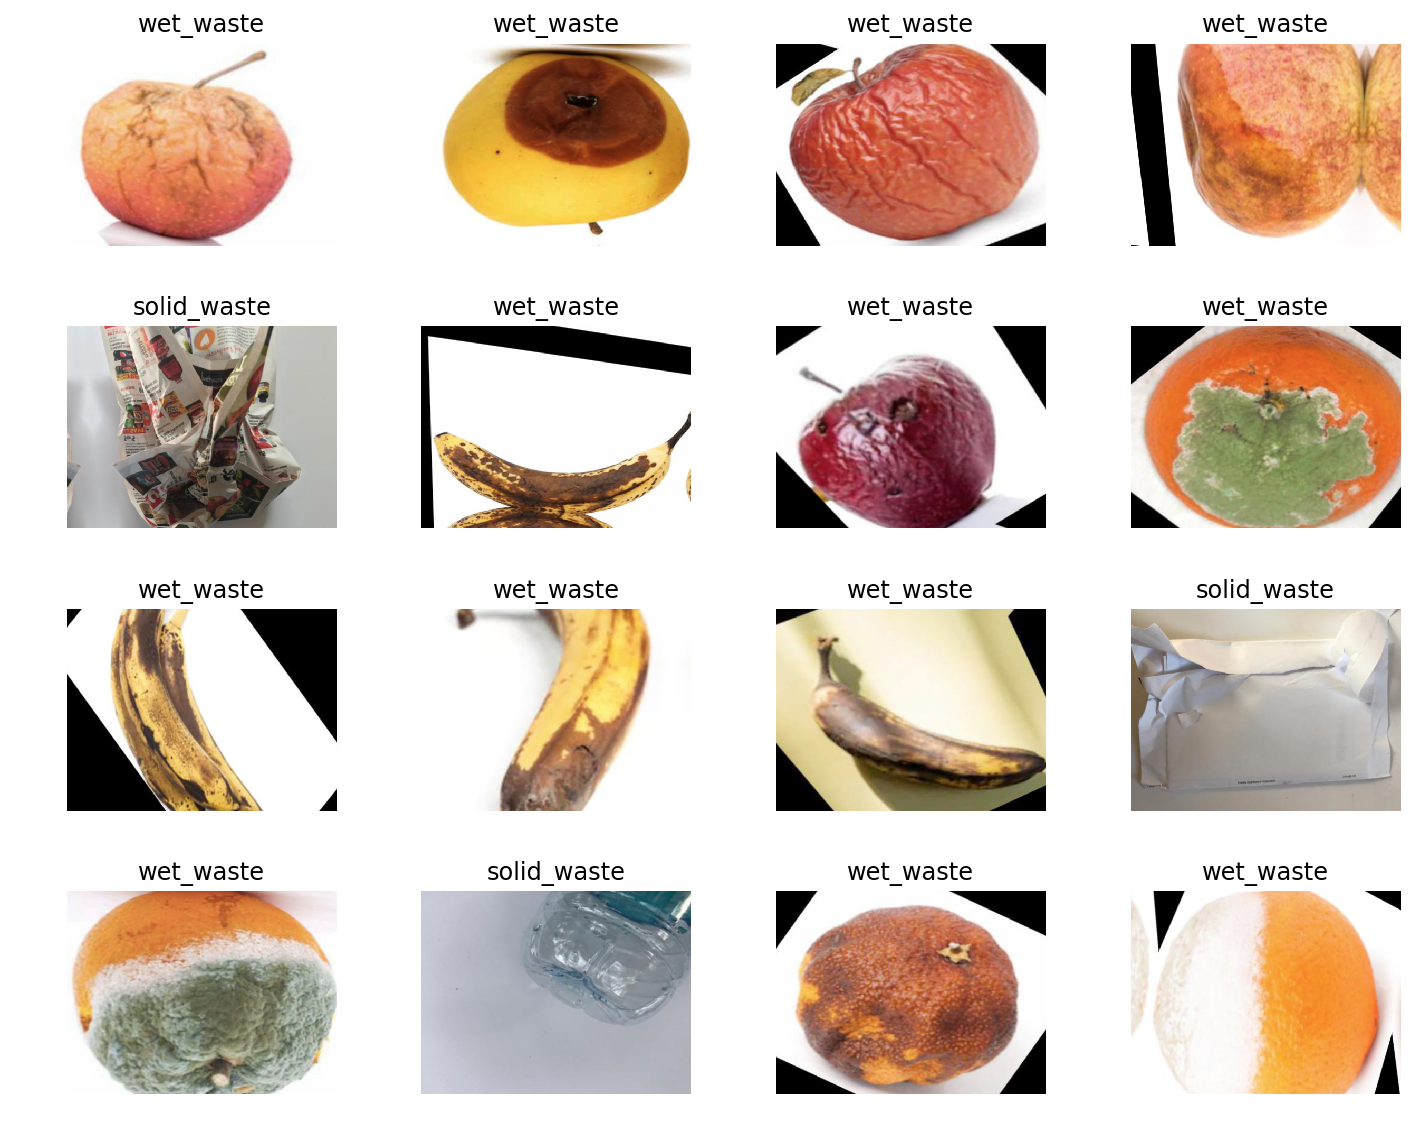

In [35]:
data.show_batch(rows = 4, figsize = (10,8))

# 3. Model training

In [36]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 109MB/s]


In [37]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

### learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


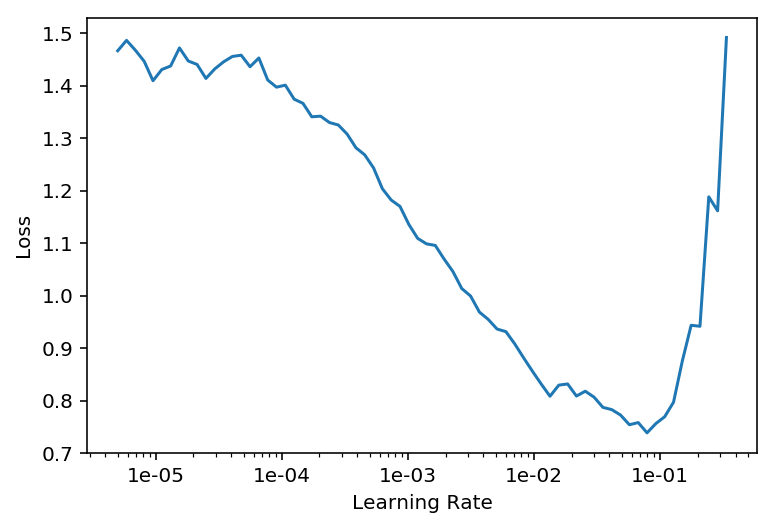

In [38]:
learn.lr_find(start_lr = 1e-6, end_lr = 1e1)
learn.recorder.plot()

In [0]:
#Get loss values and their corresponding gradients, and get lr values
losses = np.array(learn.recorder.losses)
loss_grad = np.gradient(losses)
lrs = learn.recorder.lrs

#Search for index in gradients where loss is lowest before the loss spike
#Initialize right and left idx using the lr_diff as a spacing unit
#Set the local min lr as -1 to signify if threshold is too low
r_idx = -1
l_idx = r_idx - lr_diff
while (l_idx >= -len(losses)) and (abs(loss_grad[r_idx] - loss_grad[l_idx]) > loss_threshold):
    local_min_lr = lrs[l_idx]
    r_idx -= 1
    l_idx -= 1

lr_to_use = local_min_lr * adjust_value